# DSCI 503 - Project 4
### Jeffery Boczkaja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Part 1: Loading the Dataset; Preliminary Analysis
We will load the data into a DataFrame, and will explore the structure of the data set.

In [2]:
fc = pd.read_csv('forest_cover.txt', delimiter='\t')
fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


We will determine the size of the dataset. The first number will be the number of rows while the second will be the number of columns.

In [3]:
fc.shape

(15120, 13)

We will now inspect the distribution of cover types in the datasets.

In [4]:
cover_type_counts = fc['Cover_Type'].value_counts().sort_index()
cover_type_counts

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

We will create a list of seven colors to be used as a palette in plots that we
will create later.

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area
We will start by determining the distribution of the wilderness areas within our dataset. 

In [6]:
wilderness_area_counts = fc['Wilderness_Area'].value_counts().sort_index()
wilderness_area_counts

Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

We will create a DataFrame to determine the how many regions of each cover type are in each of the four wilderness areas. 

In [7]:
ct_by_wa = pd.crosstab(fc['Cover_Type'], fc['Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


We will visually represent the information in the DataFrame you just created in the form of a stacked bar chart.

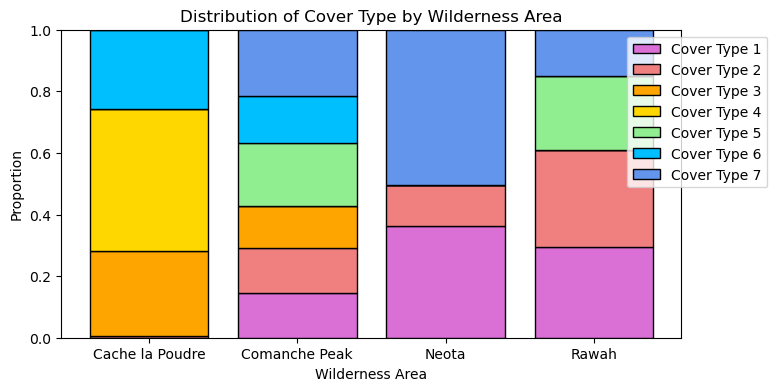

In [8]:
ct_by_wa_props = ct_by_wa.div(ct_by_wa.sum())
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props
fig = plt.figure(figsize=[8, 4])
for i, row in ct_by_wa_props.iterrows():
    plt.bar(ct_by_wa_props.columns, row, bottom=bb.loc[i], edgecolor='black', color=palette[i-1], label='Cover Type '+str(i))
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

## Part 3: Distribution of Cover Type by Soil Type
We will start by creating a DataFrame to determine the number of regions of each cover type there are for each of the 40 soil types.

In [9]:
ct_by_st = pd.crosstab(fc['Cover_Type'], fc['Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


We will start by creating a DataFrame to determine the number of regions of each cover type there are for each of the 40 soil types.

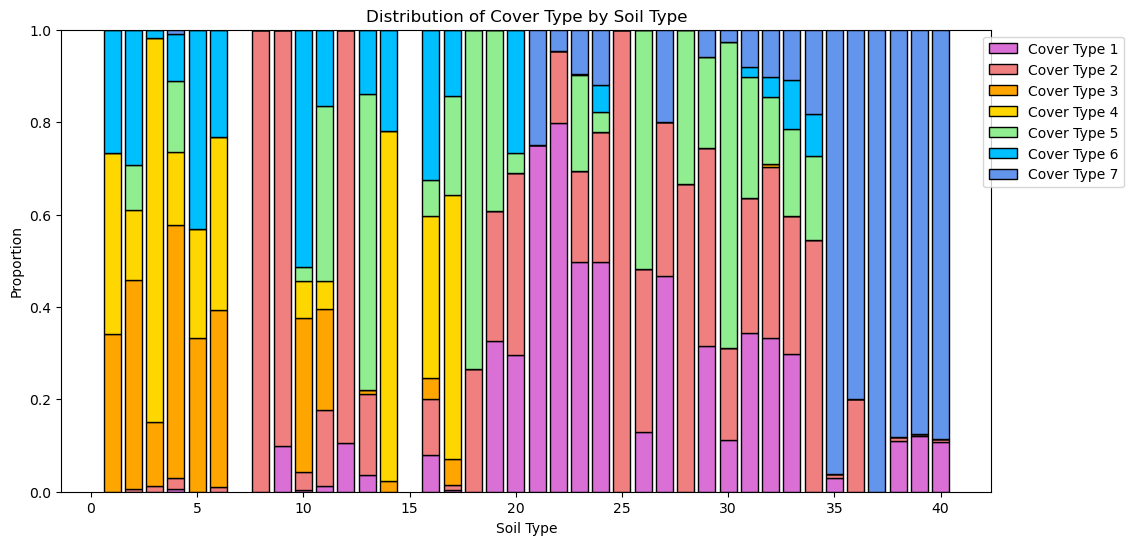

In [10]:
ct_by_st_props = ct_by_st.div(ct_by_st.sum())
bb = np.cumsum(ct_by_st_props) - ct_by_st_props
fig = plt.figure(figsize=[12, 6])
for i, row in ct_by_st_props.iterrows():
    plt.bar(ct_by_st_props.columns, row, bottom=bb.loc[i], edgecolor='black', color=palette[i-1], label='Cover Type '+str(i))
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Soil Type')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

## Part 4: Distribution of Elevation by Cover Type
We will start by calculating the average elevation for each of the seven cover types. 

In [11]:
elevation_mean_by_cover_type = fc[['Elevation', 'Cover_Type']].groupby('Cover_Type').mean()
elevation_mean_by_cover_type

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


We will create histograms to visually explore the distribution of elevations for each of the seven cover types. 

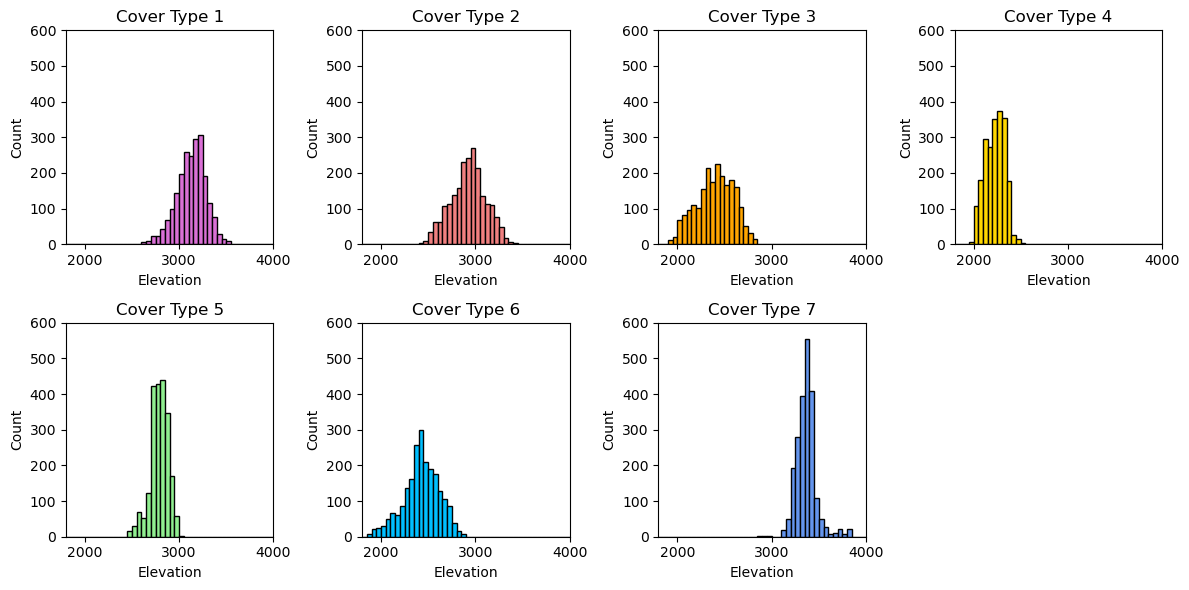

In [12]:
fig = plt.figure(figsize=[12, 6])
for i in range(1, 8):
    ax = fig.add_subplot(2, 4, i)
    cover_type_data = fc[fc['Cover_Type'] == i]
    ax.hist(cover_type_data['Elevation'], bins=np.arange(1800, 4050, 50), color=palette[i-1], edgecolor='black')
    ax.set_title('Cover Type ' + str(i))
    ax.set_xlim([1800, 4000])
    ax.set_ylim([0, 600])
    ax.set_xlabel('Elevation')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets
We will start by separating the categorical features, the numerical features, and the labels. 

In [13]:
num_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
               'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
               'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
X_num = fc[num_columns].values
cat_columns = ['Wilderness_Area', 'Soil_Type']
X_cat = fc[cat_columns].values
y = fc['Cover_Type'].values
print("Numerical Feature Array Shape:   ", X_num.shape)
print("Categorical Feature Array Shape: ", X_cat.shape)
print("Label Array Shape:               ", y.shape)

Numerical Feature Array Shape:    (15120, 10)
Categorical Feature Array Shape:  (15120, 2)
Label Array Shape:                (15120,)


 We will now be encoding the categorical variables using one-hot encoding. 

In [14]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_cat)
X_enc = encoder.transform(X_cat)
print("Encoded Feature Array Shape:", X_enc.shape)

Encoded Feature Array Shape: (15120, 42)


C:\Users\whitl\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


We will now combine the numerical features with the encoded features.

In [15]:
X = np.hstack((X_num, X_enc))
print("Feature Array Shape: ", X.shape)

Feature Array Shape:  (15120, 52)


We will now split the data into training, validation, and test sets, using a 70/15/15 split.

In [16]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)
print("Training Features Shape:    ", X_train.shape)
print("Validation Features Shape:  ", X_valid.shape)
print("Test Features Shape:        ", X_test.shape)

Training Features Shape:     (10584, 52)
Validation Features Shape:   (2268, 52)
Test Features Shape:         (2268, 52)


## Part 6: Logistic Regression Model
We will create and evaluate a logistic regression model.

In [17]:
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial', penalty='none')
lr_mod.fit(X_train, y_train)
train_acc = lr_mod.score(X_train, y_train)
valid_acc = lr_mod.score(X_valid, y_valid)
print("Training Accuracy:  ", round(train_acc, 4))
print("Validation Accuracy:", round(valid_acc, 4))

C:\Users\whitl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Training Accuracy:   0.6156
Validation Accuracy: 0.6116


C:\Users\whitl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part 7: Decision Tree Models
We will create and evaluate several decision tree models.

In [18]:
dt_train_acc = []
dt_valid_acc = []
depth_range = range(2, 31)
for depth in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=depth)
    temp_tree.fit(X_train, y_train)
    train_acc = temp_tree.score(X_train, y_train)
    valid_acc = temp_tree.score(X_valid, y_valid)
    dt_train_acc.append(train_acc)
    dt_valid_acc.append(valid_acc)
dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]
opt_train_acc = dt_train_acc[dt_idx]
opt_valid_acc = dt_valid_acc[dt_idx]
print("Optimal value for max_depth:          ", round(dt_opt_depth, 4))
print("Training Accuracy for Optimal Model:  ", round(opt_train_acc, 4))
print("Validation Accuracy for Optimal Model:", round(opt_valid_acc, 4))

Optimal value for max_depth:           18
Training Accuracy for Optimal Model:   0.9804
Validation Accuracy for Optimal Model: 0.772


We will plot the training and validation curves as a function of max_depth.

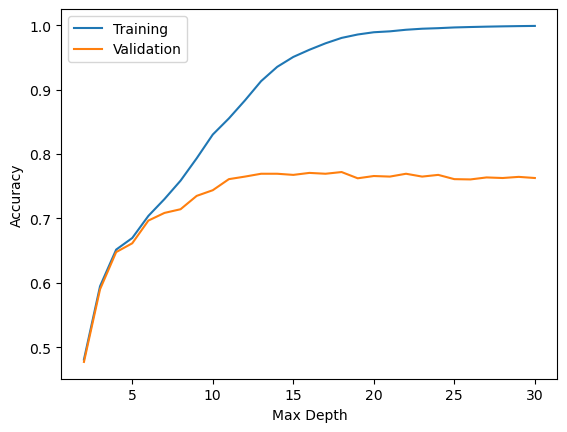

In [19]:
fig, ax = plt.subplots()
ax.plot(depth_range, dt_train_acc, label="Training")
ax.plot(depth_range, dt_valid_acc, label="Validation")
ax.set_xlabel("Max Depth")
ax.set_ylabel("Accuracy")
ax.legend()
plt.show()

## Part 8: Random Forest Models
We will create and evaluate several random forest models.

In [20]:
rf_train_acc = []
rf_valid_acc = []
for depth in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=1)
    temp_forest.fit(X_train, y_train)
    train_acc = temp_forest.score(X_train, y_train)
    valid_acc = temp_forest.score(X_valid, y_valid)
    rf_train_acc.append(train_acc)
    rf_valid_acc.append(valid_acc)
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]
rf_opt_train_acc = rf_train_acc[rf_idx]
rf_opt_valid_acc = rf_valid_acc[rf_idx]
print("Optimal value for max_depth:          ", round(rf_opt_depth, 4))
print("Training Accuracy for Optimal Model:  ", round(rf_opt_train_acc, 4))
print("Validation Accuracy for Optimal Model:", round(rf_opt_valid_acc, 4))

Optimal value for max_depth:           28
Training Accuracy for Optimal Model:   1.0
Validation Accuracy for Optimal Model: 0.8677


We will plot the training and validation curves as a function of max_depth.

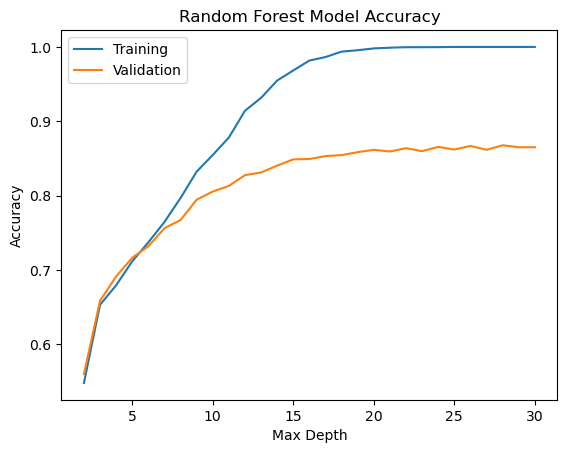

In [21]:
fig, ax = plt.subplots()
ax.plot(depth_range, rf_train_acc, label='Training')
ax.plot(depth_range, rf_valid_acc, label='Validation')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Model Accuracy')
ax.legend()
plt.show()

## Part 9: Create and Evaluate Final Model
We will be using the random forest model because it has the highest validation accuracy of the models tested. The optimal max depth will be 28 for the model as well.

In [22]:
np.random.seed(1)
final_model = RandomForestClassifier(max_depth=28, n_estimators=100)
final_model.fit(X_train, y_train)
train_acc = final_model.score(X_train, y_train)
valid_acc = final_model.score(X_valid, y_valid)
test_acc = final_model.score(X_test, y_test)
print("Training Accuracy for Final Model:  ", round(train_acc, 4))
print("Validation Accuracy for Final Model:", round(valid_acc, 4))
print("Testing Accuracy for Final Model:   ", round(test_acc, 4))

Training Accuracy for Final Model:   1.0
Validation Accuracy for Final Model: 0.8677
Testing Accuracy for Final Model:    0.8593


We will now create and display a confusion matrix detailing the model's performance on the test set.

In [23]:
test_pred = final_model.predict(X_test)
cm = confusion_matrix(y_test, test_pred)
labels = np.arange(1, 8)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df

,1,2,3,4,5,6,7
1,236,63,2,0,5,0,18
2,53,239,6,0,13,10,3
3,0,2,262,18,2,40,0
4,0,0,6,313,0,5,0
5,0,11,4,0,305,4,0
6,0,0,33,11,1,279,0
7,8,1,0,0,0,0,315


We will now generate a classification report to provide further insight into the model's performance on the test set. 

In [24]:
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

           1       0.79      0.73      0.76       324
           2       0.76      0.74      0.75       324
           3       0.84      0.81      0.82       324
           4       0.92      0.97      0.94       324
           5       0.94      0.94      0.94       324
           6       0.83      0.86      0.84       324
           7       0.94      0.97      0.95       324

    accuracy                           0.86      2268
   macro avg       0.86      0.86      0.86      2268
weighted avg       0.86      0.86      0.86      2268

